<a href="https://colab.research.google.com/github/nurilhaidar/PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image
from google.colab.patches import cv2_imshow

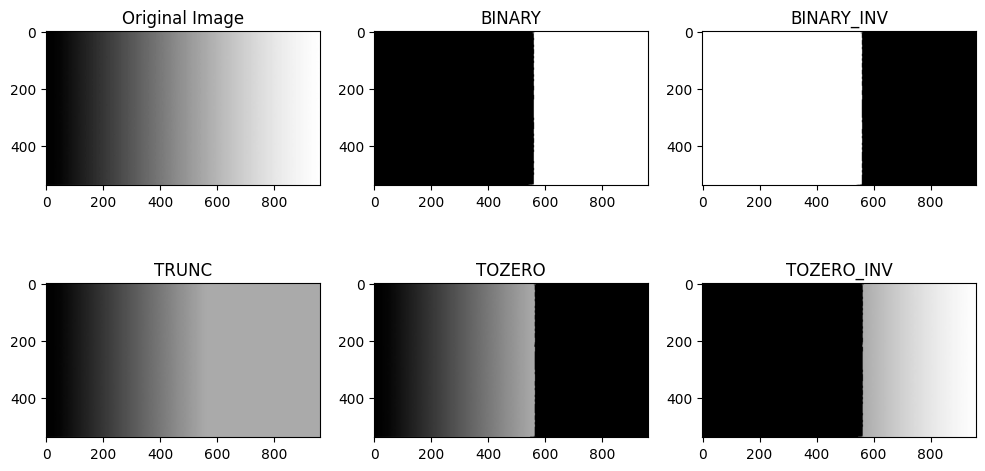

In [63]:
# Memuat gambar
img = cv.imread('/content/drive/MyDrive/Images/gradient.jpg',0)

# Inisiasi nilai threshold
threshold = 170

# Binary (jika lebih dari sama dengan threshold biner menjadi 1, sebaliknya menjadi 0)
def binary(img, threshold):
  p, l = img.shape

  final_img = np.zeros((p,l), dtype=np.uint8)

  for i in range(p):
    for j in range(l):
      if img[i,j] >= threshold:
        final_img[i,j] = 255
      else:
        final_img[i,j] = 0

  return final_img

# Binary invers (jika lebih dari sama dengan threshold biner menjadi 0, sebaliknya menjadi 1)
def binary_inv(img, threshold):
  p, l = img.shape

  final_img = np.zeros((p,l), dtype=np.uint8)

  for i in range(p):
    for j in range(l):
      if img[i,j] >= threshold:
        final_img[i,j] = 0
      else:
        final_img[i,j] = 255

  return final_img

# Trunc (jika lebih dari threshold pixel berubah menjadi threshold, sebaliknya tetap di pixel asli)
def trunc(img, threshold):
  p, l = img.shape

  final_img = np.zeros((p,l), dtype=np.uint8)

  for i in range(p):
    for j in range(l):
      if img[i,j] > threshold:
        final_img[i,j] = threshold
      else:
        final_img[i,j] = img[i,j]

  return final_img

# To Zero (jika lebih dari threshold biner menjadi binner 0, sebaliknya tetap di pixel asli)
def to_zero(img, threshold):
  p, l = img.shape

  final_img = np.zeros((p,l), dtype=np.uint8)

  for i in range(p):
    for j in range(l):
      if img[i,j] > threshold:
        final_img[i,j] = 0
      else:
        final_img[i,j] = img[i,j]

  return final_img

# To Zero Inverse (jika lebih dari threshold tetap pada pixel asli, sebaliknya menjadi binner 0)
def to_zero_inv(img, threshold):
  p, l = img.shape

  final_img = np.zeros((p,l), dtype=np.uint8)

  for i in range(p):
    for j in range(l):
      if img[i,j] > threshold:
        final_img[i,j] = img[i,j]
      else:
        final_img[i,j] = 0

  return final_img

# Menampilkan gambar
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(binary(img, threshold), cmap='gray')
axes[1].set_title('BINARY')
axes[2].imshow(binary_inv(img, threshold), cmap='gray')
axes[2].set_title('BINARY_INV')
axes[3].imshow(cv.cvtColor(trunc(img, threshold), cv.COLOR_BGR2RGB))
axes[3].set_title('TRUNC')
axes[4].imshow(cv.cvtColor(to_zero(img, threshold), cv.COLOR_BGR2RGB))
axes[4].set_title('TOZERO')
axes[5].imshow(cv.cvtColor(to_zero_inv(img, threshold), cv.COLOR_BGR2RGB))
axes[5].set_title('TOZERO_INV')
plt.show()